<a href="https://colab.research.google.com/github/moonjune/test-repo/blob/master/knlp_kaggle_BoW_prac.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

참고:  텐서플로와 머신러닝으로 시작하는 자연어 처리
!pip install kaggle
from google.colab import files
files.upload()

In [0]:
os.chdir('/content')
!ls -1ha kaggle.json

kaggle.json


In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
# Permission Warning 이 일어나지 않도록 
!chmod 600 ~/.kaggle/kaggle.json

In [0]:
!git clone https://github.com/NLP-kr/tensorflow-ml-nlp.git
import os
os.chdir('/content/tensorflow-ml-nlp')
!pip install -r requirements.txt


fatal: destination path 'tensorflow-ml-nlp' already exists and is not an empty directory.


In [0]:
!mkdir -p /content/kaggle_bag_of_word
os.chdir('/content/kaggle_bag_of_word')
!kaggle competitions download -c word2vec-nlp-tutorial

  0% 0.00/276k [00:00<?, ?B/s]
100% 276k/276k [00:00<00:00, 41.2MB/s]
 35% 9.00M/26.0M [00:00<00:00, 85.0MB/s]
100% 26.0M/26.0M [00:00<00:00, 127MB/s] 
 79% 10.0M/12.6M [00:00<00:00, 41.7MB/s]
100% 12.6M/12.6M [00:00<00:00, 49.8MB/s]
100% 13.0M/13.0M [00:00<00:00, 31.1MB/s]



In [0]:
!ls

data_in			  sampleSubmission.csv	unlabeledTrainData.tsv
labeledTrainData.tsv	  testData.tsv		unlabeledTrainData.tsv.zip
labeledTrainData.tsv.zip  testData.tsv.zip


In [0]:
import zipfile

In [0]:
DATA_IN_PATH = '/content/kaggle_bag_of_word/'

file_list = ['labeledTrainData.tsv.zip','unlabeledTrainData.tsv.zip', 'testData.tsv.zip']

for file in file_list:
  zipRef = zipfile.ZipFile(DATA_IN_PATH + file, 'r')
  zipRef.extractall(DATA_IN_PATH)
  zipRef.close()
             

In [0]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline # 그래프를 주피터 노트북에서 바로 그리도록 함

UsageError: unrecognized arguments: # 그래프를 주피터 노트북에서 바로 그리도록 함


In [0]:
train_data = pd.read_csv(DATA_IN_PATH+"labeledTrainData.tsv", header = 0, delimiter = "\t", quoting = 3)

In [0]:
train_data.head()

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."
3,"""3630_4""",0,"""It must be assumed that those who praised thi..."
4,"""9495_8""",1,"""Superbly trashy and wondrously unpretentious ..."


In [0]:
print("파일 크기 : ")
for file in os.listdir(DATA_IN_PATH):
  if 'tsv' in file and 'zip' not in file:
    print(file.ljust(30) + str(round(os.path.getsize(DATA_IN_PATH + file) / 1000000, 2)) + 'MB')

파일 크기 : 
testData.tsv                  32.72MB
unlabeledTrainData.tsv        67.28MB
labeledTrainData.tsv          33.56MB


In [0]:
print('전체 학습 데이터의 개수: {}'.format(len(train_data)))

전체 학습 데이터의 개수: 25000


In [0]:
train_length = train_data['review'].apply(len)
train_length.head()

0    2304
1     948
2    2451
3    2247
4    2233
Name: review, dtype: int64

Text(0, 0.5, 'Number of review')

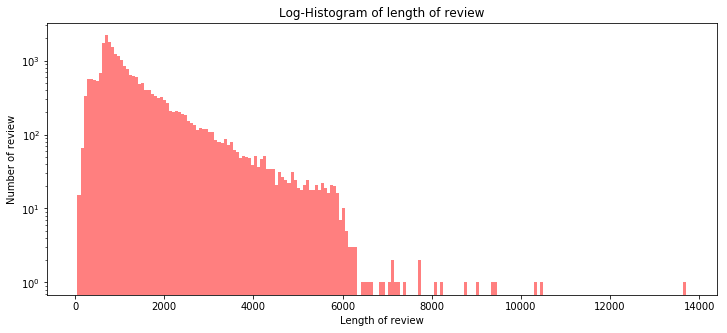

In [0]:
# 그래프에 대한 이미지 크기 선언
# figsize: (가로, 세로) 형태의 튜플로 입력
plt.figure(figsize=(12, 5))

# 히스토그램 선언
# bins: 히스토그램 값에 대한 버킷 범위
# range: x축 값의 범위
# alpha: 그래프 색상 투명도
# color: 그래프 색상
# label: 그래프에 대한 라벨
plt.hist(train_length, bins = 200, alpha = 0.5, color = 'r', label = 'word')
plt.yscale('log', nonposy = 'clip')
# 그래프 제목
plt.title('Log-Histogram of length of review')
# 그래프 x축 라벨
plt.xlabel('Length of review')
# 그래프 y축 라벨
plt.ylabel('Number of review')

In [43]:
print('리뷰 길이 최댓값: {}'.format(np.max(train_length)))
print('리뷰 길이 최솟값: {}'.format(np.min(train_length)))
print('리뷰 길이 평균값: {:.2f}'.format(np.mean(train_length)))
print('리뷰 길이 표준편차: {:.2f}'.format(np.std(train_length)))

print('리뷰 길이 1사분위값: {:.0f}'.format(np.percentile(train_length, 25)))
print('리뷰 길이 중간값: {}'.format(np.median(train_length)))
print('리뷰 길이 3사분위값: {}'.format(np.percentile(train_length, 75)))



리뷰 길이 최댓값: 13710
리뷰 길이 최솟값: 54
리뷰 길이 평균값: 1329.71
리뷰 길이 표준편차: 1005.22
리뷰 길이 1사분위값: 705
리뷰 길이 중간값: 983.0
리뷰 길이 3사분위값: 1619.0
